In [1]:
import cv2
import matplotlib.pyplot as plt
import sys
import numpy as np
sys.path.append('..')
from stars import BH_stars_img
from telescope_simulator import TelescopeSimulator

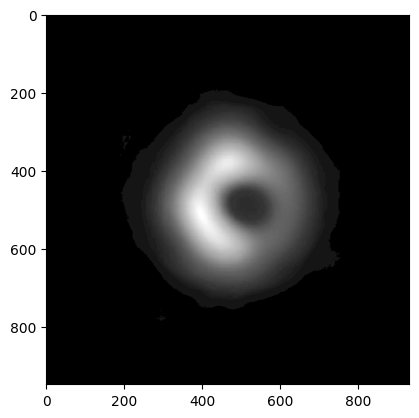

In [2]:
M87 = cv2.imread('M87_after.png', 0)
M87_rotated = cv2.rotate(M87, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(M87_rotated, cmap='gray')

In [3]:
# img = BH_stars_img(BHs_path='tele_datasets/224/', BHs=M87_rotated, num_stars=10, num_BHs=1, stars_lower_size=30, stars_upper_size=50,
#                     BHS_lower_size=64, BH_upper_size=75, height=3072, width=3072, bg_color=0, shape='rect')
# img.stars_gen()
# img.BHs_gen()
# noise_BHs = img.add_noise(img.stars_BHs_img, radius=0)
# cv2.imwrite('out_put_M87.png', noise_BHs)
# # plt.imshow(img.stars_BHs_img, cmap='gray')
# # plt.show()
# img.txtGen(txt_path='labels.txt')

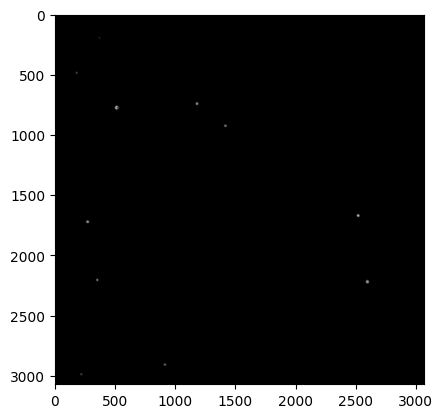

In [4]:
M87_out = cv2.imread('out_put_M87.png', 0)
plt.imshow(M87_out, cmap='gray')

In [5]:
angular_pixel_size_input_image = 5e-4

In [6]:
tele_config = dict(
    # physical parameters
    input_image = r"./stars/BHs.png", telescope_diameter_m = 6.5,
    telescope_focal_length_m = 131.4, angular_pixel_size_input_image = angular_pixel_size_input_image,
    wavelength = 100e-9, CCD_pixel_size = angular_pixel_size_input_image * 131.4 / 206265,
    CCD_pixel_count = 3072, show = False,
)

In [7]:
tele_config['input_image'] = M87_out
show = False
telescope_simulator = TelescopeSimulator(**tele_config)
intensity_image = telescope_simulator.get_intensity(M87_out, show=show)
conv_image = telescope_simulator.get_convolved_image(M87_out, intensity_image, show=show)
output_img = telescope_simulator.generate_image(conv_image, show=show)
# output_img = telescope_simulator.generate_image(show=False)


In [8]:
output_img = output_img.astype(np.uint8)
output_img = cv2.resize(output_img, (1024, 1024))

In [9]:
cv2.imwrite('output_img_conv.png', output_img)

True

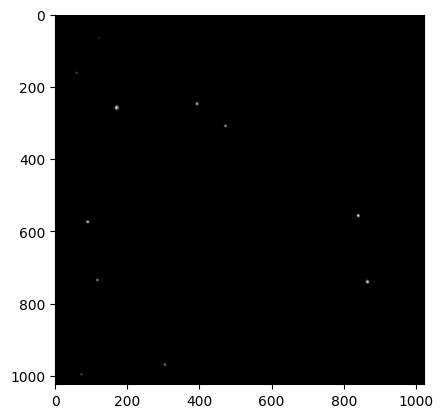

In [10]:
plt.imshow(output_img, cmap='gray')

In [2]:
%cd ../yolov5

c:\Users\fyq\Documents\deepshadow\yolov5


In [12]:
# from pathlib import Path
# ../logs_yolo/yolov5-2024-02-15_15-08-50/runs/train/results_1/weights/best.pt
import glob
# log_path = Path('../logs_yolo')
# for best in glob.glob('../logs_yolo/**/*best.pt', recursive=True):
#     # print(best)
best = '../logs_yolo/yolov5-2024-02-15_15-08-50/runs/train/results_1/weights/best.pt'
!python detect.py --weights {best} --source ../model_testing/output_img_conv.png --img-size 1024 --conf 0.5 --save-txt --save-conf


detect: weights=['../logs_yolo/yolov5-2024-02-15_15-08-50/runs/train/results_1/weights/best.pt'], source=../model_testing/output_img_conv.png, data=data\coco128.yaml, imgsz=[1024, 1024], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-284-g95ebf68f Python-3.9.18 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\fyq\Documents\deepshadow\model_testing\output_img_conv.png: 1024x1024 10 stars, 1 BH, 12.0ms
Speed: 0.0ms pre-process, 12.0ms inference, 5.0ms NMS per image at shape (1, 3, 1024, 1024)
Results saved to runs\detect\exp
1 labels saved to

detect: weights=['../logs_yolo/yolov5-2024-02-14_22-29-44/runs/train/results_1/weights/last.pt'], source=../model_testing/output_img_conv.png, data=data\coco128.yaml, imgsz=[1024, 1024], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-284-g95ebf68f Python-3.9.18 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\fyq\Documents\deepshadow\model_testing\output_img_conv.png: 1024x1024 11 stars, 13.0ms
Speed: 1.0ms pre-process, 13.0ms inference, 4.0ms NMS per image at shape (1, 3, 1024, 1024)
Results saved to runs\detect\exp2
1 labels saved to runs